In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv('../data/temps.csv')
df.columns = ['date', 'temp']
df.head(10)

,date,temp
0,2024-12-03 20:40:40,28.15
1,2024-12-03 20:30:40,28.05
2,2024-12-03 20:20:40,27.89
3,2024-12-03 20:10:40,27.72
4,2024-12-03 20:00:40,27.52
5,2024-12-03 19:50:40,27.37
6,2024-12-03 19:40:40,27.28
7,2024-12-03 19:30:40,27.09
8,2024-12-03 19:20:40,26.87
9,2024-12-03 19:10:40,26.66


In [5]:
df['temp'].describe()

count    179573.000000
mean         28.881848
std           2.068775
min          18.330000
25%          27.890000
50%          28.990000
75%          30.090000
max          52.570000
Name: temp, dtype: float64

In [6]:
# with open("./data/temps.csv", "r") as file:
#     with open('./data/temps2.csv', 'a') as the_file:
#         for line in file:
#             the_file.write(line[:-255]+'\n')


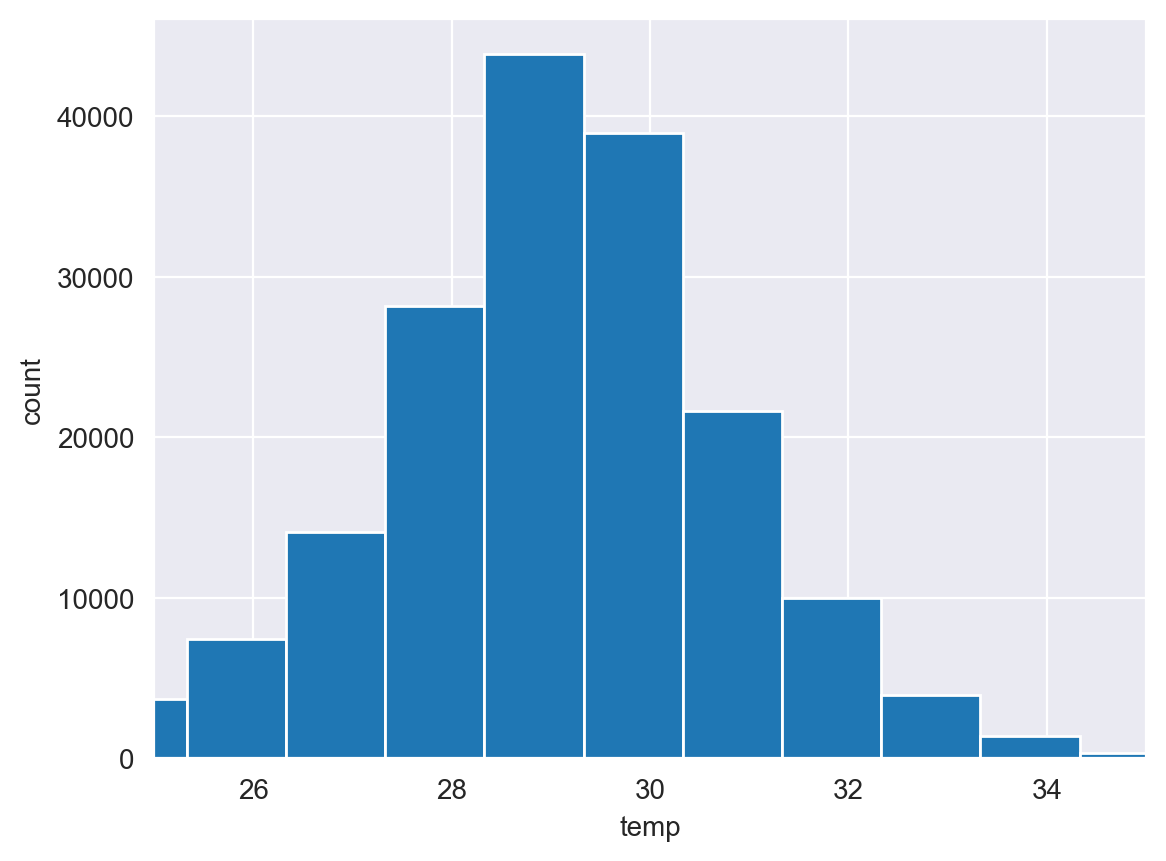

In [7]:
#sns.countplot(data=df, x='temp');
bins = np.arange(df['temp'].min(), df['temp'].max() + 1, 1)
plt.hist(data=df, x='temp', bins = bins)
plt.xlabel('temp')
plt.ylabel('count')
plt.xlim((25, 35));

In [8]:
q1 = df['temp'].quantile(0.25)
q3 = df['temp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['temp'] < lower_bound) | (df['temp'] > upper_bound)]
outliers

,date,temp
307,2024-12-01 17:30:40,24.16
308,2024-12-01 17:20:40,23.38
309,2024-12-01 17:10:40,23.32
2574,2024-11-15 23:40:40,23.64
2575,2024-11-15 23:30:40,18.85
...,...,...
178376,2021-04-19 21:57:26,24.41
178377,2021-04-19 21:47:26,24.31
179285,2021-04-13 14:27:26,33.68
179286,2021-04-13 14:17:26,34.51
